In [2]:
import cv2
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import datetime
import random
from utilities.helper_functions import helper_functions as hf
import config
import tdt
import matplotlib.pyplot as plt

## Example of how to read data output from TDT synapse 
the TDT python library is used to read the data, all you need to do is import tdt and call the read_block code on the file

In [3]:
data_path = '/mnt/teams/TM_Lab/Arjun Bhaskaran/Social interaction project/fiber photometry data/test/SI_Mouse-230801-160839'
data = tdt.read_block(data_path)

read from t=0s to t=914.51s


In [6]:
tdt.read_block(data_path, t2=1).info

read from t=0s to t=1s


tankpath:	'/mnt/teams/TM_Lab/Arjun Bhaskaran/Social interaction project/fiber photometry data/test'
blockname:	'SI_Mouse-230801-160839'
start_date:	datetime.datetime(2023, 8, 1, 16, 8, 42, 999999)
utc_start_time:	'16:08:42'
stop_date:	datetime.datetime(2023, 8, 1, 16, 23, 57, 507915)
utc_stop_time:	'16:23:57'
duration:	datetime.timedelta(seconds=914, microseconds=507916)
stream_channel:	0
snip_channel:	0

Each block has metadata associated with it under an 'info' key as shown, contains start and stop timestamps as well as information on the duration. Epocs contains time stamps of events like camera frame activations and ticks for every second 
more info: https://www.tdt.com/files/manuals/OfflineAnalysisToolsPython.pdf

In [35]:
data.info

tankpath:	'/mnt/teams/TM_Lab/Arjun Bhaskaran/Social interaction project/fiber photometry data/test'
blockname:	'SI_Mouse-230801-160839'
start_date:	datetime.datetime(2023, 8, 1, 16, 8, 42, 999999)
utc_start_time:	'16:08:42'
stop_date:	datetime.datetime(2023, 8, 1, 16, 23, 57, 507915)
utc_stop_time:	'16:23:57'
duration:	datetime.timedelta(seconds=914, microseconds=507916)
stream_channel:	0
snip_channel:	0

In [63]:
# data can be filtered by epoc
camera = tdt.epoc_filter(data, epoc='Cam1', t=[0, 0.01])

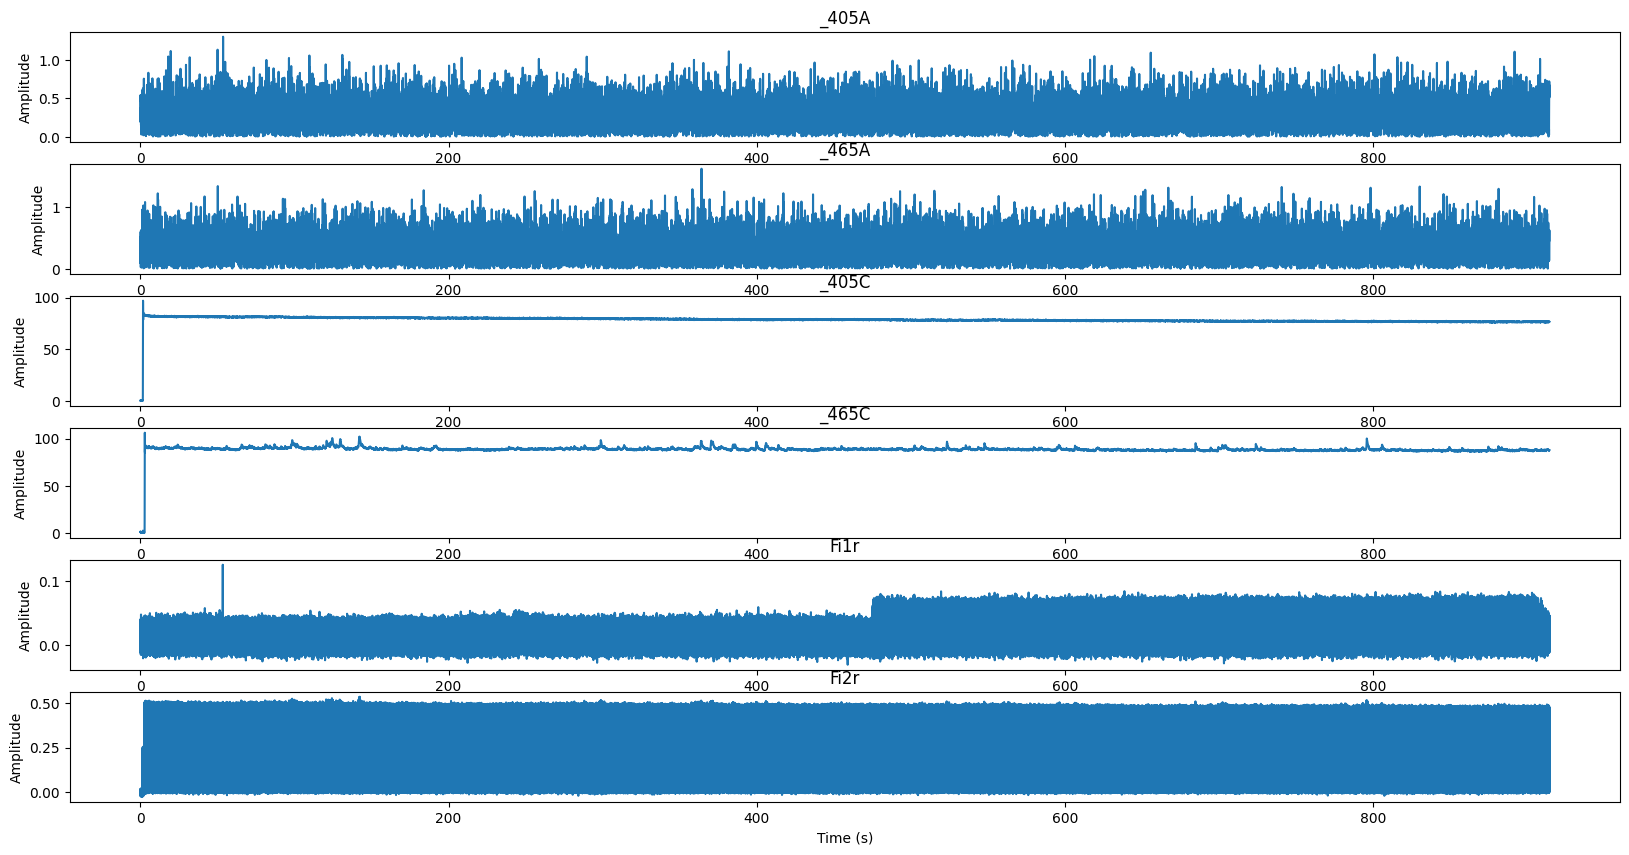

In [80]:
fig, ax = plt.subplots( len(data.streams.keys()), figsize = (20, 10))
i=0
for key in data.streams.keys():
    stream = data.streams[key].data
    num_samples = len(stream)
    stream_time  = np.linspace(1, num_samples, num_samples) / data.streams[key].fs
    ax[i].plot(stream_time, stream, label = str(key)) 
    ax[i].set_xlabel('Time (s)')
    ax[i].set_ylabel('Amplitude')
    ax[i].title.set_text(str(key))
    i+=1
